# Análise de execução de paralelismo através de Threads em c++

## Introdução

Para a análise de tempo de execução usando palalelismo criamos um programa em C++ para fazer a leitura das obras de William Shakespeare e contar o número de ocorrências das palavras "love" e "hate", explorando o paralelismo.

## Estrutura do código

Nossa função principal chama-se 'process_threads', com a ajuda de algumas funções auxiliares ela lê o arquivo texto que é recebido como parâmetro e o processa a fim de segmentá-lo em n partes "iguais", sendo n o número de threads que desejamos utilizar. Em seguida ela gera um vetor de threads e executa um loop para adicionar no vetor cada thread com a função de contar palavras no segmento reservado a ela. Após fazer isso as threads são unidas por meio de um join. Durante todo esse processo informações de quantidade de threads, tempo de execução, quantidade de palavras encontradas e palavras mais comuns são armazenadas em uma estrutura que é retornada no final da função. 

Veja abaixo o pseudo-código das principais etapas da função, apenas os trechos de contagem de tempo foram omitidos:

**Código implementado:**

```cpp

// Function to process multiple threads
search_return process_threads(int iNumThreads, string filename, string word1, string word2){
    // Create a struct to store the return values
    struct search_return search_return;

    // Text processing
    vector<string> parts = read_text(filename, iNumThreads);

    // Create and launch multiple threads
    std::vector<std::thread> threads;

    // Vector of vectors to store the count of words for each thread
    vector<vector<int>> count_vector;

    // Process each thread
    for(int i = 1; i <= iNumThreads; ++i){
        threads.push_back(std::thread([i, &count_vector, parts, word1, word2](){
            count_vector.push_back(count_words(i, parts[i-1], word1, word2));
        }));
        
    }
    // Join each thread
    for(auto& thread : threads){
        thread.join();
    }

    // Calculate the number of occurrences of the words
    vector<int> vectorSoma = somaThread(count_vector, iNumThreads);

    // Store the return values in the struct
    search_return.loveCount = vectorSoma[0];
    search_return.hateCount = vectorSoma[1];

    // Set the most used word
    if(vectorSoma[0] > vectorSoma[1]){
        search_return.mostUsedWord = word1;
    }
    else{
        search_return.mostUsedWord = word2;
    }

    // Update the number of threads
    search_return.iNumThreads = iNumThreads;

    // Update the struct with the size of the text blocks
    search_return.threadSize = parts[0].size();

    // Calculating time taken by the program for different tasks and storing it in the struct
    search_return.processTime = chrono::duration_cast<chrono::milliseconds>(end_text_processing - start_text_processing).count();
    search_return.searchTime = chrono::duration_cast<chrono::milliseconds>(end_search - start_search).count();
    search_return.totalTime = chrono::duration_cast<chrono::milliseconds>(end - start).count();

    return search_return;
}

## Análise de Execução


Para analisar o tempo de execução dado a quantidade de threads, utilizamos um loop de 1 a 100 e armazenamos essas informações em um vetor que posteriormente foi transformado em um arquivo csv para gerar o gráfico abaixo:

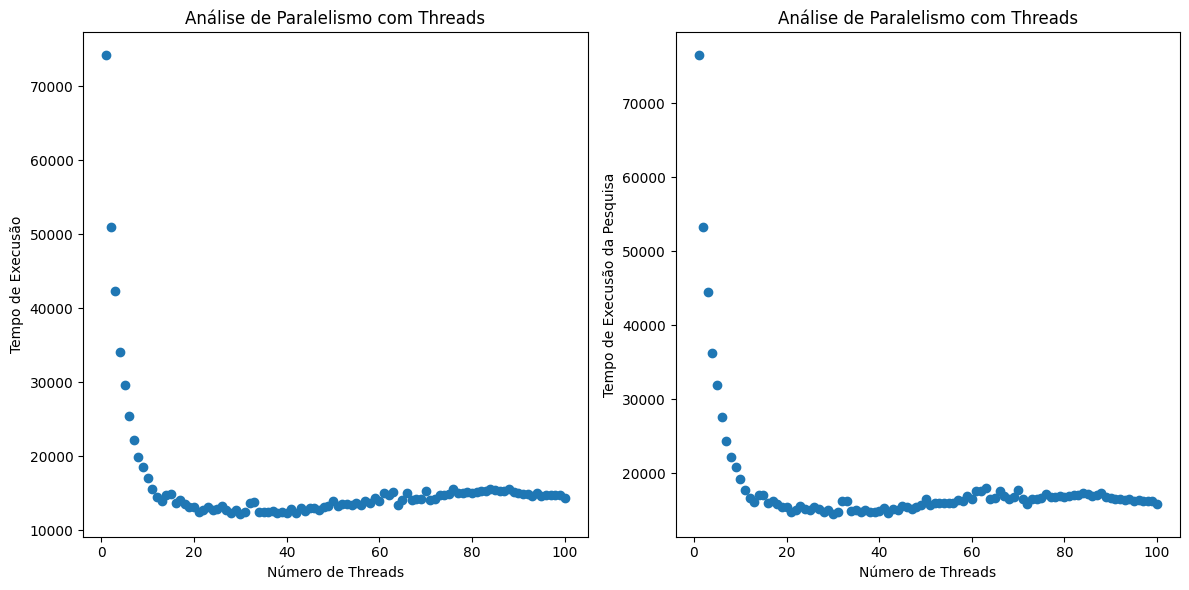

In [11]:
from view_threads import view_threads

view_threads("search_time.csv", "total_time.csv")

Como podemos ver, o tempo de execução sofre muita influência da quantidade de threads implementadas. Quanto mais paralelizamos e dividimos o processo, menos tempo é necessário para a execução do código. No início, essa queda é extrema devido a ineficiência do processo feito em concorrência. Conforme aumentamos o número de threads, esse tempo se estabiliza, pois alcançamos o limite de threads no hardware da máquina. A partir desse ponto, o sistema operacional passa a implementar paralelismo juntamente de concorrência, fazendo com que uma thread a mais ou a menos não afete tanto o tempo de execução. Note também que ambos os gráficos possuem a mesma tendência, isso ocorre porque a segmentação do texto não varia de forma significativa.